<a href="https://colab.research.google.com/github/vishnouvina/csc2516/blob/main/CSC2516_Homework_1_VishnouVINAYAGAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

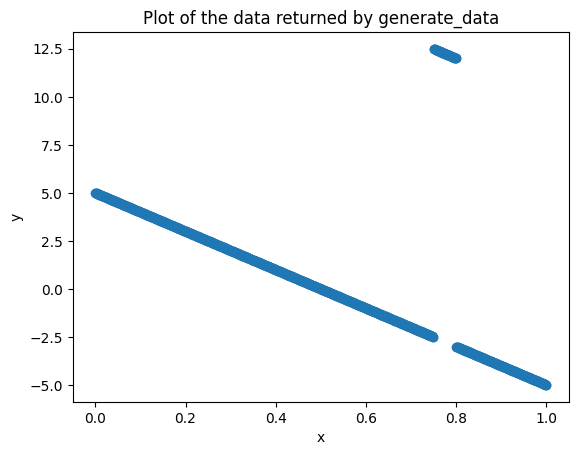

In [ ]:
x,y = generate_data()

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Plot of the data returned by generate_data')

plt.show()

*The function is piecewise-linear, as imposed by the logical condition in the definition of the function. There is no way we could approach both of the linear sections of the function at the same time with a linear regression, because eventhough the slope for each section is the same, the intercept is not.*

# 2. Implement linear regression (2.5 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

In [ ]:
def quad_loss(x,m,b,y):

  return 0.5*np.mean((m*x+b-y)**2)

def quad_loss_grad_m(x,m,b,y):

  return np.mean(x*(m*x+b-y))

def quad_loss_grad_b(x,m,b,y):

  return np.mean((m*x+b-y))

In [ ]:
def quad_gradient_descent(x,y, lr=0.1, nb_steps = 1000):
  m_quad, b_quad = np.random.rand(),np.random.rand()
  current_loss, iter_nb = [quad_loss(x,m_quad,b_quad,y)], 0

  while iter_nb < nb_steps:
      m_quad, b_quad = m_quad-lr*quad_loss_grad_m(x,m_quad,b_quad,y), b_quad-lr*quad_loss_grad_b(x,m_quad,b_quad,y)
      current_loss.append(quad_loss(x,m_quad,b_quad,y))
      iter_nb += 1

  return m_quad, b_quad, current_loss

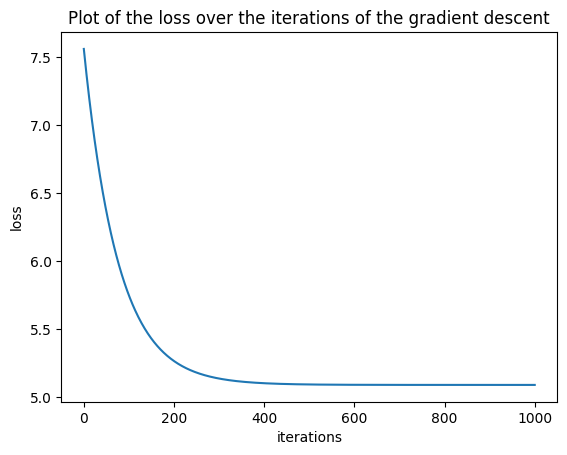

In [ ]:
m_quad, b_quad, current_loss = quad_gradient_descent(x,y)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot([i for i in range(len(current_loss))],current_loss)
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
plt.title('Plot of the loss over the iterations of the gradient descent')

plt.show()

The loss over the iterations has a curved and smooth shape, due to the quadratric designed loss-function.

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


In [ ]:
m_quad, b_quad

(-7.517176441086882, 4.508225200538351)

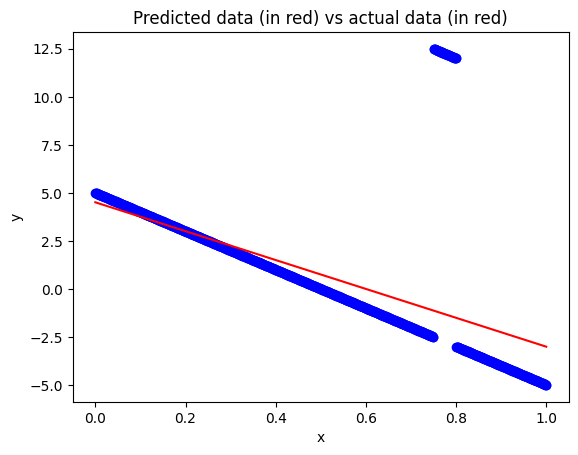

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, c='b')
ax.plot(x, m_quad*x+b_quad, c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Predicted data (in red) vs actual data (in red)')

plt.show()

The predicted line does not fit the $y = -10*x + 5$ line, because it's impacted by the outliers - the portion $x \in (0.75,0.8)$ - and hence the slope is different, and the line is deviated. We can conclude that the squared-error loss is sensitive to outliers.

# 4. "Robust" linear regression (1 point)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

In [ ]:
def abs_loss(x,m,b,y):

  return np.mean(np.abs(m*x+b-y))

def abs_loss_grad_m(x,m,b,y):

  return np.mean(x*np.sign(m*x+b-y))

def abs_loss_grad_b(x,m,b,y):

  return np.mean(np.sign(m*x+b-y))

In [ ]:
def abs_gradient_descent(x,y, lr=0.1, nb_steps = 1000):
  m_abs, b_abs = np.random.randn(),  np.random.randn()
  current_loss, iter_nb = [abs_loss(x,m_abs,b_abs,y)], 0

  while iter_nb < nb_steps:
    m_abs -= lr*abs_loss_grad_m(x,m_abs,b_abs,y)
    b_abs -= lr*abs_loss_grad_b(x,m_abs,b_abs,y)
    current_loss.append(abs_loss(x,m_abs,b_abs,y))
    iter_nb += 1

  return m_abs, b_abs, current_loss

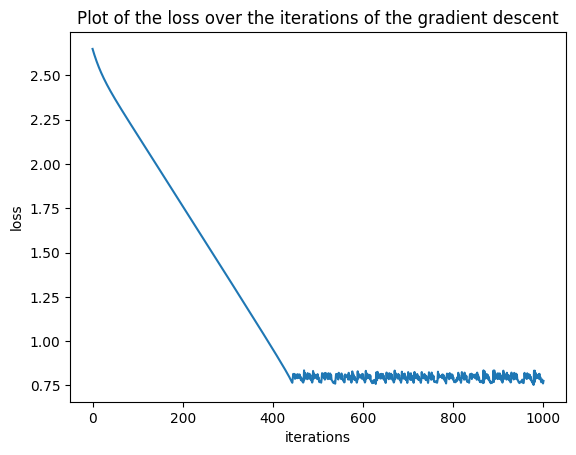

In [ ]:
m_abs, b_abs, current_loss = abs_gradient_descent(x,y)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot([i for i in range(len(current_loss))],current_loss)
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
plt.title('Plot of the loss over the iterations of the gradient descent')

plt.show()

The loss curve over the iterations is linear-shaped and sharper than for the squared-error, and then lays flat (with some perturbations on a small magnitude range). This is due to the mathematical nature of the loss function (not differentiable in 0 and piecewise-linear).

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

In [ ]:
m_abs, b_abs

(-9.95508611900826, 5.007560333901444)

Those values are way closer to the true values used in $\textit{generate_data}$, because the absolute-value loss is less sensitive to outliers. Therefore, it was able to predict $y = -10*x + 5$ pretty accurately, contrary to the squared-error loss.

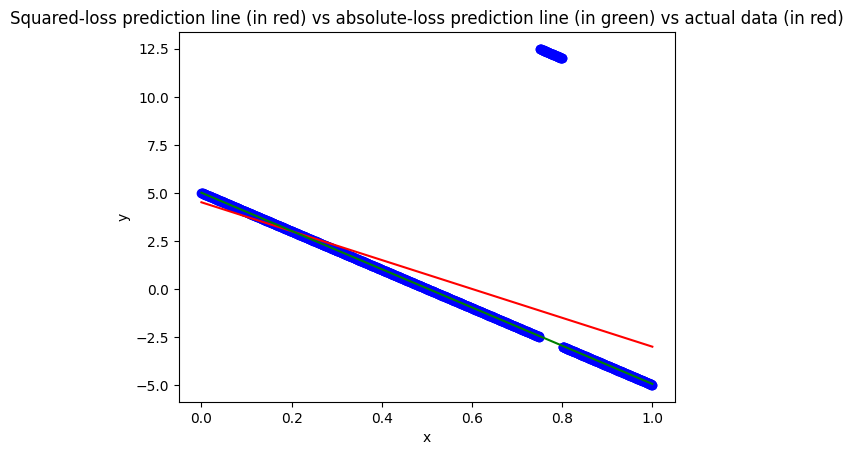

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, c='b')
ax.plot(x, m_quad*x+b_quad, c='r')
ax.plot(x, m_abs*x+b_abs, c='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Squared-loss prediction line (in red) vs absolute-loss prediction line (in green) vs actual data (in red)')

plt.show()